In [10]:
pip install xgboost

  Using cached xgboost-3.1.3-py3-none-win_amd64.whl.metadata (2.0 kB)
Using cached xgboost-3.1.3-py3-none-win_amd64.whl (72.0 MB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, kstest, anderson


#Grab data and put numerical vals in one table
#################################################################################################################
dataset_as_given = pd.read_csv(r"d:\Desktop\Practice Python\21.gym_members_exercise_tracking.csv")
#print(dataset_as_given)

# Get column names
column_names = dataset_as_given.columns
#print(column_names)

desired = ["Age", "Weight (kg)", "Height (m)", "Max_BPM", "Avg_BPM", "Resting_BPM", 
           "Session_Duration (hours)", "Calories_Burned", "Fat_Percentage", "Water_Intake (liters)", "Workout_Frequency (days/week)", "Experience_Level", "BMI"]

dataset_as_given_numeric = dataset_as_given[desired]



#Get Rid of Outliers
#################################################################################################################

# Copy the dataset so you keep the original intact
cleaned_df = dataset_as_given.copy()

# Select numeric columns
numeric_cols = cleaned_df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    Q1 = cleaned_df[col].quantile(0.25)
    Q3 = cleaned_df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out outliers
    cleaned_df = cleaned_df[(cleaned_df[col] >= lower_bound) & (cleaned_df[col] <= upper_bound)]



print("Original rows:", dataset_as_given.shape[0])
print("Cleaned rows:", cleaned_df.shape[0])
print("Rows removed:", dataset_as_given.shape[0] - cleaned_df.shape[0])


#################################################################################################################

encoded_df = cleaned_df.copy()

encoded_df['Gender'] = encoded_df['Gender'].map({
    'Male': 1,
    'Female': 0
})

workout_dummies = pd.get_dummies(encoded_df['Workout_Type'], prefix='Workout', drop_first=True)
encoded_df = pd.concat([encoded_df.drop(columns=['Workout_Type']), workout_dummies], axis=1)




Original rows: 973
Cleaned rows: 931
Rows removed: 42


In [2]:
# ============================================================
#   TRAIN/TEST SPLIT + SCALING
#   This prepares your data for any ML model
# ============================================================

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# ------------------------------------------------------------
# 1. Define X (features) and y (target)
# ------------------------------------------------------------
# Gender must already be encoded as 0/1 in encoded_df
X = encoded_df.drop(columns=['Gender'])
y = encoded_df['Gender']

# ------------------------------------------------------------
# 2. Train/Test Split
# ------------------------------------------------------------
# test_size=0.2 means 20% of data is held out for testing
# random_state=42 ensures reproducibility
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ------------------------------------------------------------
# 3. Scale the numeric features
# ------------------------------------------------------------
# Scaling helps models like Logistic Regression, SVM, KNN, Neural Networks
# Tree-based models (Random Forest, XGBoost) do NOT require scaling,
# but scaling does not harm them.
scaler = StandardScaler()

# Fit on training data ONLY, then transform both sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ------------------------------------------------------------
# 4. Optional: Print shapes to confirm everything looks right
# ------------------------------------------------------------
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

print("\nScaled versions created: X_train_scaled, X_test_scaled")


X_train shape: (744, 16)
X_test shape: (187, 16)
y_train shape: (744,)
y_test shape: (187,)

Scaled versions created: X_train_scaled, X_test_scaled


K-Nearest Neighbor (KNN) Algorithm is a supervised machine learning algorithm that is generally used for classification but can also be used for regression tasks<br><br>

The algorithm works by finding the "K" closest data points (neighbors) to a given input and makes a prediction based on the majority class (for classification) ir the average value (for regression)<br><br>

This type of algorithm makes no assumption about the underlaying data distribution it makes it a non-parametric and instance based learning method<br><br>

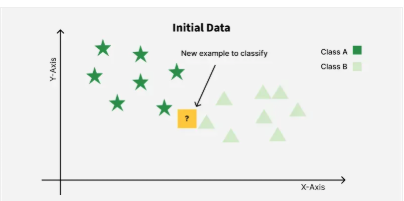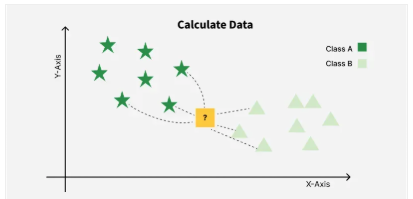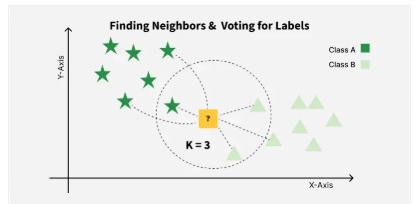<br><br>

K-Nearest neighbors is also called a lazy learner algorithm because it does not learn from the training set immediately - instead, it stores the entire dataset and performs computations only at the time of classification<br><br>

As an example - let us consider 2 features which will be called Category 1 and Category 2<br><br>

- KNN assigns the category based on the majority of nearby points -> the image below shows how KNN predicts the category of a new data point based on its closest neighbours<br><br>

- The green points represent Category 1 while the red points represent Category 2<br><br>

- The new datapoint checks its closest neighbours (circled points)<br><br>

- Since the majority of its closest neighbours are red points (belonging to Category 2) -> the model predicts that the new data point belongs to Category 2 as well<br><br>

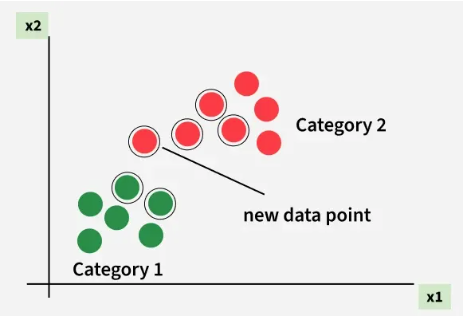<br><br>

The discussed type of model uses proximity and majority voting to make predictions<br><br>

The 'K' in K Nearest Neighbour is just a number that tells the algorithm how many nearby points or neighbours to look at when it makes a decision<br><br>

Example: We are trying to put a specific fruit in a category -> therefor we compare its shape and size to that of fruits that are already familiar to us<br>
- If K = 3 -> the algorithm looks at the closest 3 fruits to the new one<br>
- If 2 of those 3 fruits are apples and 1 is a banana, the algorithm says the new fruit is an apple because most of its neighbours are apples<br><br>

How is the value of K for the KNN Algorithm chosen?<br><br>

- The value of K in the algorithm decides how many neighbours the algorithm looks at when making a prediction<br><br>

- Choosing the correct K is important for good results <br><br>

- If the data contains lots of noise or outliers, using a larger K can make the predictions more stable<br><br>

- But if K is too large, the model can become too simple and miss important patterns and this is called underfitting<br><br>

- K should be picked carefully based on the existing data<br><br>

What are some possible Statistical Methods for Selecting K?<br><br>

- Cross-Validation -> this is a good way to find the best value of K using k-fold validation. For this to happen, the dataset will be devided into K parts, then the model will be trained on some of the parts and tested on the remainder of the parts. The process repeats itself for all of the parts. The K value that gives the highest value for accuracy during the tests - is normally the best k value to use<br><br>

- Elbow Methods -> for this method, a graph is drawn that shows the error rate or accuracy for various K values. As K increases, the error usually drops at first, and after a certain point the error stops decresing quickly. The point where the curve changes direction and looks like an 'elbow' is usually the best choice for K this method offers<br><br>
https://www.geeksforgeeks.org/machine-learning/k-nearest-neighbours/<br><br>

Machine Learning in general -> talk about overfitting, underfitting and so on

In [5]:
# ============================================================
# K-NEAREST NEIGHBORS (KNN)
# Looks at the 'closest' data points. Needs scaling.
# Look for performance drop if dataset is high-dimensional.
# ============================================================

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))


KNN Accuracy: 0.946524064171123


Accuracy: 0.9465

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        94
           1       0.97      0.92      0.95        93

    accuracy                           0.95       187
   macro avg       0.95      0.95      0.95       187
weighted avg       0.95      0.95      0.95       187



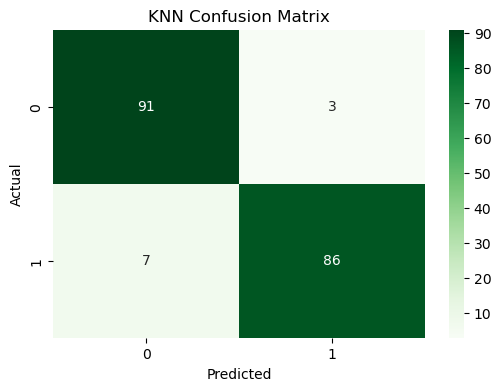

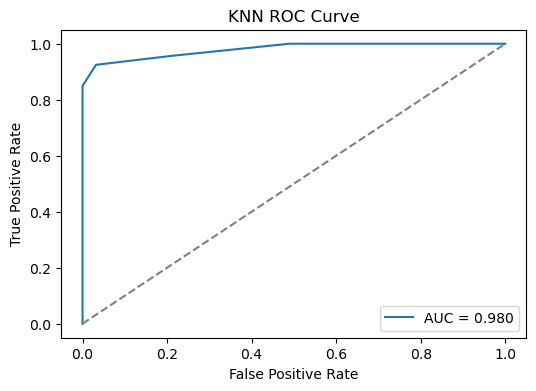

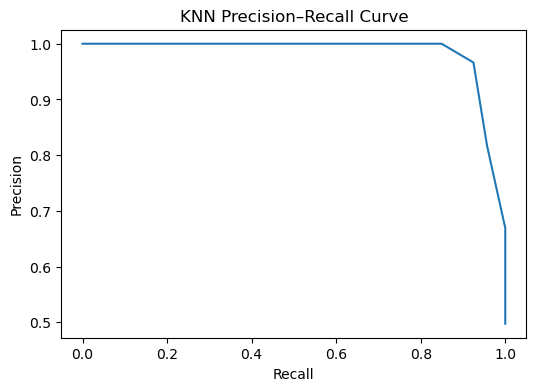


Average distance to 5 nearest neighbors: 2.5601
Lower values mean the data clusters well (good for KNN).


In [15]:
# ============================================================
#   K-NEAREST NEIGHBORS (KNN) — FULL MODEL EVALUATION
#   This cell trains the KNN model and evaluates it using:
#     ✔ Accuracy
#     ✔ Classification Report
#     ✔ Confusion Matrix
#     ✔ ROC Curve + AUC
#     ✔ Precision–Recall Curve
#     ✔ Distance-based intuition (unique to KNN)
#   Every section includes comments explaining what to look for.
# ============================================================

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_curve, auc, precision_recall_curve
)
import numpy as np

# ------------------------------------------------------------
# 1. Train the KNN model
# ------------------------------------------------------------
# KNN relies heavily on distances between points.
# Scaling is CRITICAL — without it, features with large ranges dominate.
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predictions
y_pred_knn = knn.predict(X_test_scaled)
y_prob_knn = knn.predict_proba(X_test_scaled)[:, 1]  # needed for ROC/PR curves


# ------------------------------------------------------------
# 2. Accuracy Score
# ------------------------------------------------------------
# Accuracy = proportion of correct predictions.
# KNN can struggle in high-dimensional datasets.
accuracy = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy: {accuracy:.4f}")


# ------------------------------------------------------------
# 3. Classification Report
# ------------------------------------------------------------
# Shows precision, recall, and F1-score for each class.
# Look for balanced values across both classes.
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))


# ------------------------------------------------------------
# 4. Confusion Matrix
# ------------------------------------------------------------
# Shows EXACTLY where the model is making mistakes.
# Diagonal = correct predictions.
# Off-diagonal = errors.
cm = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# ------------------------------------------------------------
# 5. ROC Curve + AUC Score
# ------------------------------------------------------------
# ROC curve shows how well the model separates the two classes.
# AUC close to 1.0 = excellent.
fpr, tpr, thresholds = roc_curve(y_test, y_prob_knn)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], linestyle='--', color='grey')
plt.title("KNN ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


# ------------------------------------------------------------
# 6. Precision–Recall Curve
# ------------------------------------------------------------
# Useful when one class is less common.
# Look for curves that stay high (good precision)
# and far right (good recall).
precision, recall, thresholds = precision_recall_curve(y_test, y_prob_knn)

plt.figure(figsize=(6,4))
plt.plot(recall, precision)
plt.title("KNN Precision–Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()


# ------------------------------------------------------------
# 7. Distance-based intuition (unique to KNN)
# ------------------------------------------------------------
# KNN predictions depend on the distances to the nearest neighbors.
# We can inspect the average distance to the 5 nearest neighbors.
# Lower distances = tighter clusters = easier classification.
distances, indices = knn.kneighbors(X_test_scaled)

avg_distance = np.mean(distances)
print(f"\nAverage distance to 5 nearest neighbors: {avg_distance:.4f}")
print("Lower values mean the data clusters well (good for KNN).")
